In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")


In [3]:
url = 'https://raw.githubusercontent.com/MaximZherlygin/CV/main/train.csv'
data = pd.read_csv(url)
data.tail()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
data.shape


(1460, 81)

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
data.isna().mean()


MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=10)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

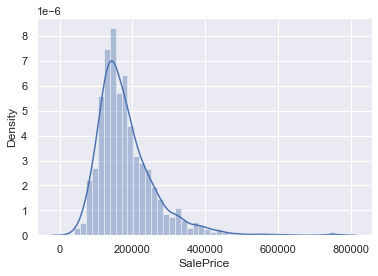

In [10]:
sns.distplot(Y_train)


In [14]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [15]:
num_features = data.select_dtypes(include=np.number).columns.tolist()
X1 = data[num_features].drop(columns=["SalePrice"])
num_features = X1.columns
X1 = X1.fillna(method='bfill')
X1.isna().mean()

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y, test_size=0.3, random_state=10)

In [16]:
linear = linear_model.LinearRegression()
linear.fit(X1_train, Y1_train)
print ("LinearRegression:", linear.score(X1_test, Y1_test))
print ("LR RMSE:", np.sqrt(mean_squared_error(linear.predict(X1_test), Y1_test)))

LinearRegression: 0.8232226705111072
LR RMSE: 32181.300977143557


In [17]:
ridge = linear_model.Ridge()
ridge.fit(X1_train, Y1_train)
print ("Ridge:", ridge.score(X1_test, Y1_test))
print ("Ridge RMSE:", np.sqrt(mean_squared_error(ridge.predict(X1_test), Y1_test)))

Ridge: 0.8233341735997828
Ridge RMSE: 32171.15012668727


In [18]:
lasso = linear_model.Lasso()
lasso.fit(X1_train, Y1_train)
print ("Lasso:", lasso.score(X1_test, Y1_test))
print ("Lasso RMSE:", np.sqrt(mean_squared_error(lasso.predict(X1_test), Y1_test)))


Lasso: 0.8232358440338031
Lasso RMSE: 32180.101872602285


$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [19]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [20]:
def rmse(y, y_first):
    return np.sqrt( np.mean( np.square(y - y_first) ) )

cross_validate(linear_model.Lasso(),
              X1, y, cv=7,
              scoring = {'RMSE': make_scorer(rmse)})

{'fit_time': array([0.01200581, 0.00899625, 0.00800061, 0.00699997, 0.00799823,
        0.00800061, 0.00899959]),
 'score_time': array([0.00299788, 0.00199938, 0.00199986, 0.00100136, 0.00100064,
        0.00199986, 0.0010004 ]),
 'test_RMSE': array([29259.81871992, 27603.18714656, 37260.38211109, 40601.54243965,
        28166.86814972, 43350.88431013, 55728.47050389])}

In [21]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

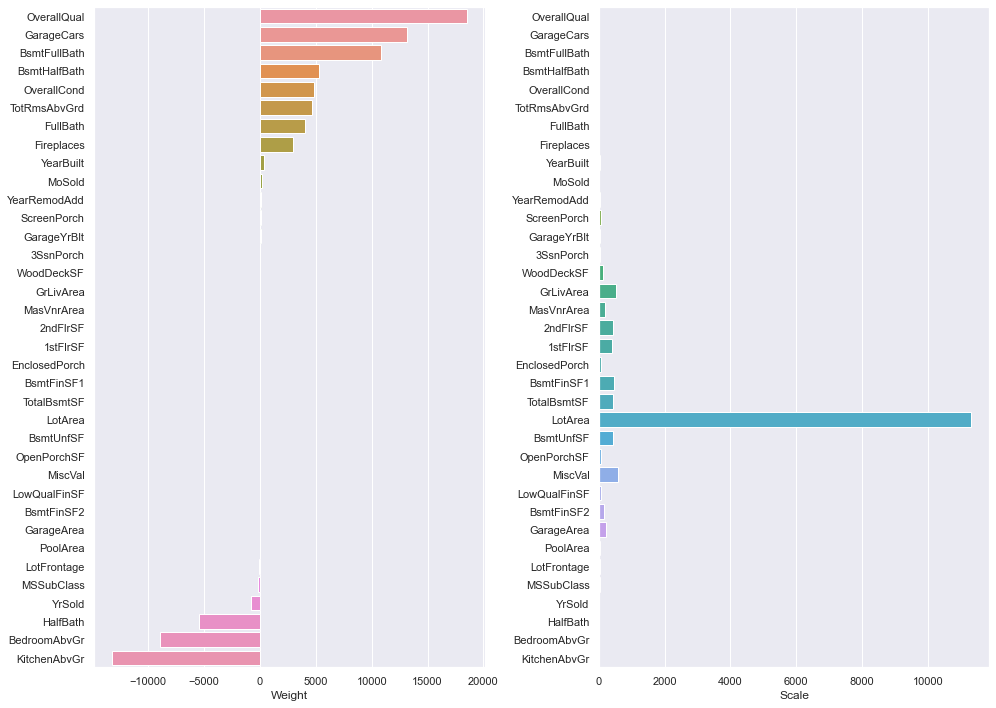

In [22]:
show_weights(num_features, linear.coef_, X_train[num_features].std())

In [23]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO

from sklearn.preprocessing import StandardScaler

In [24]:
pca = StandardScaler()

pca.fit(X1_train)
X_train_scaled = pca.transform(X1_train)
X_test_scaled  = pca.transform(X1_test)

In [25]:
linear.fit(X_train_scaled, Y1_train)
print ("LR:", linear.score(X_test_scaled, Y1_test))
print ("LR RMSE:", rmse(linear.predict(X_test_scaled), Y1_test))

LR: 0.8231323306744212
LR RMSE: 32189.522851942347


In [26]:
ridge.fit(X_train_scaled, Y1_train)
print ("Ridge:", ridge.score(X_test_scaled, Y1_test))
print ("Ridge RMSE:", rmse(ridge.predict(X_test_scaled), Y1_test))

Ridge: 0.8233470950741593
Ridge RMSE: 32169.973593845854


In [27]:
lasso.fit(X_train_scaled, Y1_train)
print ("Lasso:", lasso.score(X_test_scaled, Y1_test))
print ("Lasso RMSE:", rmse(lasso.predict(X_test_scaled), Y1_test))

Lasso: 0.8232336974099816
Lasso RMSE: 32180.297269579576


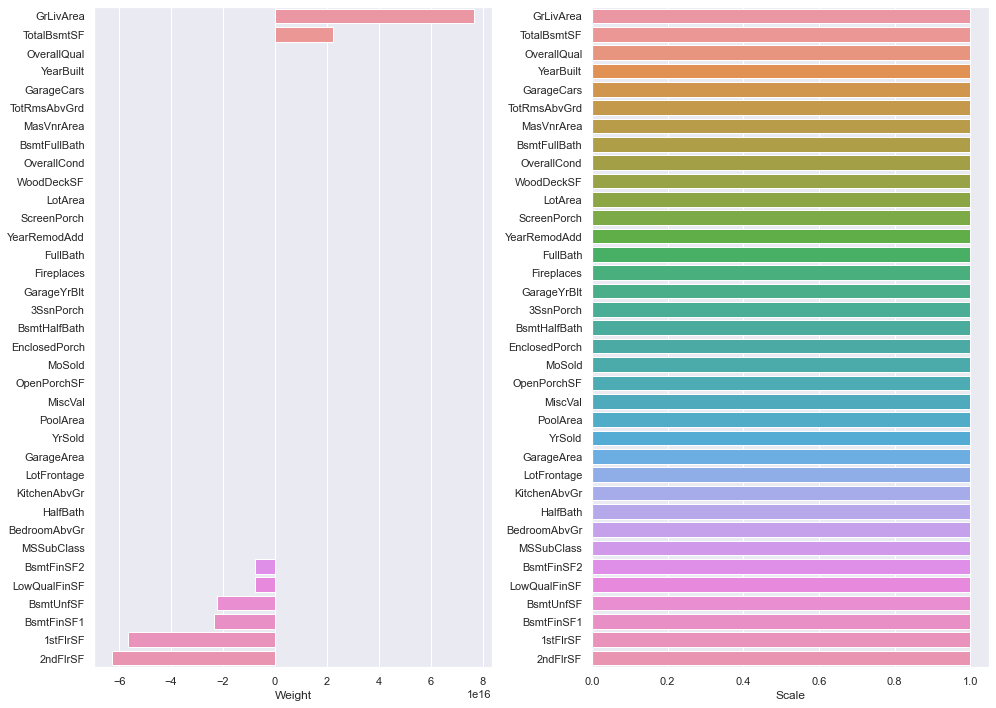

In [28]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=num_features)
show_weights(num_features, linear.coef_, scales)

In [29]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO

from sklearn.model_selection import GridSearchCV

In [30]:
alpha_grid_search = GridSearchCV(lasso, 
                                {'alpha': np.arange(0.5, 200.1, 0.5)},
                                scoring=make_scorer(rmse, greater_is_better=False),
                                verbose=10)
alpha_grid_search.fit(X_train_scaled, Y1_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5; 1/400] START alpha=0.5.................................................
[CV 1/5; 1/400] END .............alpha=0.5;, score=-43839.142 total time=   0.0s
[CV 2/5; 1/400] START alpha=0.5.................................................
[CV 2/5; 1/400] END .............alpha=0.5;, score=-32439.972 total time=   0.0s
[CV 3/5; 1/400] START alpha=0.5.................................................
[CV 3/5; 1/400] END .............alpha=0.5;, score=-54866.208 total time=   0.0s
[CV 4/5; 1/400] START alpha=0.5.................................................
[CV 4/5; 1/400] END .............alpha=0.5;, score=-48915.457 total time=   0.0s
[CV 5/5; 1/400] START alpha=0.5.................................................
[CV 5/5; 1/400] END .............alpha=0.5;, score=-28470.784 total time=   0.0s
[CV 1/5; 2/400] START alpha=1.0.................................................
[CV 1/5; 2/400] END .............alpha=1.0;, 

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,...
       171.5, 172. , 172.5, 173. , 173.5, 174. , 174.5, 175. , 175.5,
       176. , 176.5, 177. , 177.5, 178. , 178.5, 179. , 179.5, 180. ,
       180.5, 181. , 181.5, 182. , 182.5, 183. , 183.5, 184. , 184.5,
       185. , 185.5, 186. , 186.5, 187. , 187.5, 188. , 188.5, 189. ,
       189.5, 190. , 190.5, 191. , 191.5, 192. , 192.5, 193. , 193.5,
       194. , 194.5, 195. , 195.5, 196. , 

In [31]:
print(alpha_grid_search.best_params_)
print(alpha_grid_search.best_score_)
print(alpha_grid_search.best_estimator_)

alpha_grid_search.score(X_test_scaled, Y1_test)

{'alpha': 200.0}
-41441.70663925023
Lasso(alpha=200.0)


-32021.772175309998

In [32]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO

from sklearn.pipeline import Pipeline

In [33]:
lp = Pipeline([('scaler', StandardScaler()), ('lasso', linear_model.Lasso(alpha=200.0))])
lp.fit(X1_train, Y1_train)
print ("Lasso-Pipeline:", lp.score(X1_test, Y1_test))
print("RMSE:", rmse(lp.predict(X1_test), Y1_test))

Lasso-Pipeline: 0.8249709638165417
RMSE: 32021.772175309998


In [34]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")
X_train[num_features] = X_train[num_features].fillna(method='ffill')
X_test[num_features] = X_test[num_features].fillna(method='ffill')

In [35]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1444,RL,Pave,NotGiven,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
597,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,New,Partial
792,RL,Pave,NotGiven,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1260,RL,Pave,NotGiven,IR3,Lvl,AllPub,CulDSac,Gtl,Gilbert,RRAn,...,BuiltIn,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
714,RL,Pave,NotGiven,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


In [36]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
def create_column_transformer():
    return ColumnTransformer(
           [('scale', StandardScaler(), list(map(lambda x : X_train.columns.get_loc(x), num_features))),
            ('encode', OneHotEncoder(), list(map(lambda x : X.columns.get_loc(x), categorical)))])

X[categorical] = X[categorical].fillna("NotGiven")
X[num_features] = X[num_features].fillna(method='ffill')
column_transformer = create_column_transformer()
column_transformer.fit(X)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 [0, 2, 3, 16, 17, 18, 19, 25, 33, 35, 36, 37,
                                  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53,
                                  55, 58, 60, 61, 65, 66, 67, ...]),
                                ('encode', OneHotEncoder(),
                                 [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31,
                                  32, 34, 38, 39, 40, 41, ...])])

In [38]:
print("Size before One-Hot:", X_train.shape)
print("Size after One-Hot:", column_transformer.transform(X_train).shape)

Size before One-Hot: (1022, 79)
Size after One-Hot: (1022, 304)


In [39]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

X1_train = column_transformer.transform(X_train)
X1_test = column_transformer.transform(X_test)

Ridge: 0.8819872890529769
Ridge RMSE: 26293.881790929714
Lasso: 0.8789670042475789
Lasso RMSE: 26628.224152185125


In [ ]:
try:
    ridge = linear_model.Ridge()
    ridge.fit(X1_train, Y1_train)
    print ("Ridge:", ridge.score(X1_test, Y1_test))
    print ("Ridge RMSE:", np.sqrt(mean_squared_error(ridge.predict(X1_test), Y1_test)))
except ValueError as e:
    print(e)

try:
    lasso = linear_model.Lasso()
    lasso.fit(X1_train, Y1_train)
    print ("Lasso:", lasso.score(X1_test, Y1_test))
    print ("Lasso RMSE:", np.sqrt(mean_squared_error(lasso.predict(X1_test), Y1_test)))
except ValueError as e:
    print(e)

In [40]:
lp = Pipeline([('lasso', linear_model.Lasso())])
rp = Pipeline([('ridge', linear_model.Ridge())])

rp.fit(X1_train, Y1_train)
print ("Ridge:", rp.score(X1_test, Y1_test))
print ("Ridge RMSE:", rmse(rp.predict(X1_test), Y1_test))

lp.fit(X1_train, Y1_train)
print ("Ridge:", lp.score(X1_test, Y1_test))
print ("Ridge RMSE:", rmse(lp.predict(X1_test), Y1_test))

Ridge: 0.8819872890529769
Ridge RMSE: 26293.881790929714
Ridge: 0.8789670042475789
Ridge RMSE: 26628.224152185125


In [41]:
ridge_zeros = np.sum(rp.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lp.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 10
Zero weights in Lasso: 44


In [42]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO

gs = GridSearchCV(linear_model.Ridge(), 
                [{'alpha': np.arange(0.6, 100.5, 0.4)},],
                cv=5,
                scoring=make_scorer(rmse, greater_is_better=False))

gs.fit(X1_train, Y1_train)
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 16.6}
-36810.37798939456


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

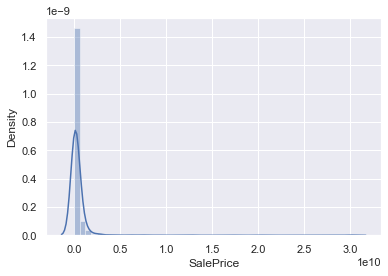

In [43]:
error = (Y1_train - lasso.predict(X1_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [44]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO

def stop_quantile(error, quantile, count):
    max = np.max(error)
    min = np.min(error)
    bins = np.linspace(min, max, count)
    
    error_classes = np.digitize(error, bins)
    nums, count = np.unique(error_classes, return_counts=True)
    sum = np.cumsum(count)
    percs = sum / sum[-1]
    
    fitting_bins = nums[percs < quantile]
    return np.isin(error_classes, fitting_bins)

stop = stop_quantile(error, 0.95, 200)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

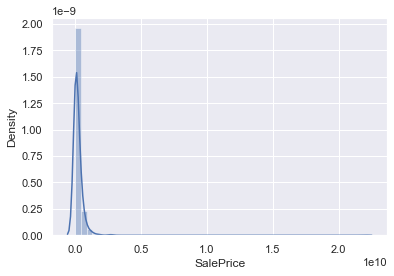

In [45]:
error = (Y1_train[stop] - ridge.predict(X1_train[stop])) ** 2
sns.distplot(error)

In [50]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO

ridge = linear_model.Ridge(alpha = 32)
ridge.fit(X1_train[stop], Y1_train[stop])
y_pred = ridge.predict(X1_test)
print(rmse(Y1_test, y_pred))

26997.95831330761
